<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/CHOI/Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 

In [1]:
from skimage.metrics import structural_similarity as ssim #method to compare image 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np #calculate 
import cv2 # to Image loaded
import os, sys # to drive mount for Colab
from google.colab.patches import cv2_imshow # to show image for Colab
from PIL import Image


# 함수

In [71]:
#driveMount("/content/drive/MyDrive/video")
def driveMount(path):
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir(path)

#MSE(Mean Square Error)
def mse(x,y): return np.sqrt(((x-y)**2).sum())/(x.shape[0])

#video convert image list
def video_to_image(vidName)->list:
  video = cv2.VideoCapture(vidName) #'' 사이에 사용할 비디오 파일의 경로 및 이름을 넣어주도록 함
  
  if not video.isOpened():
    print("Could not Open :", vidName) ; exit(0)
  width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
  length = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) ; fps = video.get(cv2.CAP_PROP_FPS) ; count = 0 ; list = [] ; threshold = 5 # 아무거나 일단
  min, sec = minSec(int(length/round(fps)))
  print("width :",width) ; print("height :",height)
  print("min :", min) ; print("sec :",sec) ; print("fps :", fps)
  
  while(video.isOpened()):
    ret,image = video.read()
    if ret:
      if(int(video.get(1)) % round(fps) == 0):

         """image = cv2_to_Image(image)
         hash = average_hash(image)
         list.append(hash)"""#이미지 해쉬로 저장
         list.append(image)
    else :
      break

  video.release()
  return width,height,list

#divide time to min , sec
def minSec(time) : 
  min = int(time // 60) ; sec = time%60
  return min, sec

def cv2_to_Image(img: np.ndarray) -> Image:
    # return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return Image.fromarray(img)


def image_to_cv2(img: Image) -> np.ndarray:
    # return cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
    return np.asarray(img)

def show_images(list):
    for i, img in enumerate(list):
        plt.subplot(131+i)
        plt.imshow(img/255.0)

def calculate_scores(list, ssim=False):
    org = list[0]
    
    for i, img in enumerate(list,start = 1):
        min, sec = minSec(i)
        mse_score = mse(org.flatten(), img.flatten())
        if ssim: 
            ssim_score = ssim(org, img, multichannel=True)
            label = "min {} sec {}; MSE: {:.4f}, SSIM: {:.4f}"
            
            print(label.format(min, sec, mse_score, ssim_score ))
            
        else:
            label = "min {} sec {}; MSE: {:.4f}"
            print(label.format(min, sec, mse_score))
        org = img

#Average Hash
def average_hash(img):
    img = img.convert("L") 
    img = img.resize((16, 16), Image.ANTIALIAS) 
    pixel_data = img.getdata() 
    pixels = np.array(pixel_data) 
    pixels = pixels.reshape((16, 16)) 
    avg = pixels.mean() 
    diff = 1 * (pixels > avg) 
    return diff

# 이진 해시로 변환
def np2hash(ahash):
    bhash = []
    for nl in ahash.tolist():
        sl = [str(i) for i in nl]
        s2 = "".join(sl)
        i = int(s2, 2) # 이진수를 정수로 변환하기
        bhash.append("%04x" % i)
    return "".join(bhash)

#해밍 거리 계산
def hamming_dist(a, b):
    aa = a.reshape(1, -1) # 1차원 배열로 변환하기
    ab = b.reshape(1, -1)
    dist = (aa != ab).sum()
    return dist


# Main

In [72]:
driveMount("/content/drive/MyDrive/video")
width,height,list = video_to_image("test1.mp4")

 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
width : 1728
height : 1080
min : 2
sec : 47
fps : 30.0


In [69]:

print(list[1].shape)
print(len(list[1]))

(1080, 1728, 3)
1080


# TEST

In [ ]:
x  =

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train = list[0].reshape(-1,height,width,1).astype('float32') / 255.

print('Training',x_train.shape,x_train.max())

Training (3, 1080, 1728, 1) 1.0


In [103]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1, input_shape=[2]) 
])

model.compile(
    loss = 'mse',
    optimizer = 'adam',# adaptive moment estimation
    metrics=['accuracy'])



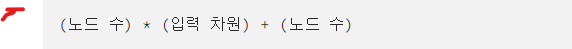

y = w * x + b

In [95]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit([0,1],[2],epochs = 10)

ValueError: ignored